In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

# mount and create path
drive.mount('/content/gdrive')

print('done')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
done


In [0]:
# load the estimators

# Logestic Regression Estimator
lr_pctr = pd.DataFrame()
lr_pctr = lr_pctr.from_csv('/content/gdrive/My Drive/Colab Notebooks/mai/lr_preds.csv')
lr_pctr = pd.DataFrame(lr_pctr['1'].values)

# xgboost Estimator
xgb_pctr = pd.DataFrame()
xgb_pctr = xgb_pctr.from_csv('/content/gdrive/My Drive/Colab Notebooks/mai/xgb_preds.csv')
xgb_pctr = pd.DataFrame(xgb_pctr['1'].values)

# Random Forest Estimator
rf_pctr = pd.DataFrame()
rf_pctr = rf_pctr.from_csv('/content/gdrive/My Drive/Colab Notebooks/mai/rf_preds.csv')
rf_pctr = pd.DataFrame(rf_pctr['1'].values)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


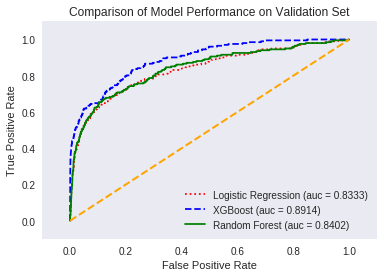

In [0]:
# plot ROC curves for the pCTR estimators

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

estimator_list =[lr_pctr,xgb_pctr,rf_pctr]  # store the estimators in the list
clf_labels = ['Logistic Regression',"XGBoost","Random Forest"]

colors = ['red','blue','green'] # specify the colors of the estimators
curves = [':','--','-','-:'] # specify the styles of the curves
    
# for each estimator, plot their roc_auc curves
# differentiate the curves using colors and curve styles
for estimators, label, clr, ls \
        in zip(estimator_list, clf_labels, colors, curves):
  fpr, tpr, thresholds = roc_curve([click for click in validation.click], estimators)
  roc_auc = auc(x = fpr, y = tpr)
  plt.plot(fpr, tpr,color = clr,linestyle = ls, 
  		   label = '%s (auc = %0.4f)' % (label, roc_auc))   

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = 'orange',
         linewidth = 2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Model Performance on Validation Set')
plt.show()












